In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [178]:
plt.rcParams["figure.dpi"] = 500

In [182]:
# reported data
ydf= pd.read_csv ("Data/All_reported_data.csv").drop("Unnamed: 0", axis =1)

# excluding outlier fields
bad_fields = pd.read_csv("Data/bad_fields.csv")
ydf = ydf.merge(bad_fields, on=["Year", "FieldID"], how="left", indicator=True)
ydf = ydf[ydf["_merge"] == "left_only"].drop(columns=["_merge"])


print(ydf.isna().sum());
print("\n")
print(ydf)

Year                     0
FieldID                  0
cropType                 0
Reported_Irrigation     38
Reported_Yield          27
Unnamed: 0             116
dtype: int64


     Year FieldID cropType  Reported_Irrigation  Reported_Yield  Unnamed: 0
0    2016     NB1     Corn           300.984585       12.428670         NaN
1    2017     NB1     Corn           297.575357       10.184502         NaN
2    2018     NB1     Corn           369.860074       13.101181         NaN
4    2020     NB1     Corn           342.563728        8.171677         NaN
5    2021     NB1     Corn           286.767030       10.247718         NaN
..    ...     ...      ...                  ...             ...         ...
136  2010     NW5     Corn                  NaN       10.427278         NaN
137  2011     NW5     Corn                  NaN        7.873083         NaN
138  2012     NW5     Corn                  NaN        8.400331         NaN
139  2013     NW5     Corn                  NaN       12.098467

In [183]:
### making separate yield and irrig files with no nans
# yld_df

yld_df = ydf[["Reported_Yield", "Year","FieldID" ]]
yld_df = yld_df.dropna(subset = ["Reported_Yield"])


#irrig_df

irrig_df= ydf[["Reported_Irrigation", "Year","FieldID" ]]
irrig_df= irrig_df.dropna(subset = ["Reported_Irrigation"])
irrig_df


,Reported_Irrigation,Year,FieldID
0,300.984585,2016,NB1
1,297.575357,2017,NB1
2,369.860074,2018,NB1
4,342.563728,2020,NB1
5,286.767030,2021,NB1
...,...,...,...
94,288.890049,2015,NW2
95,279.738151,2015,NW3
96,331.420370,2015,NW4
97,342.272578,2015,NW5


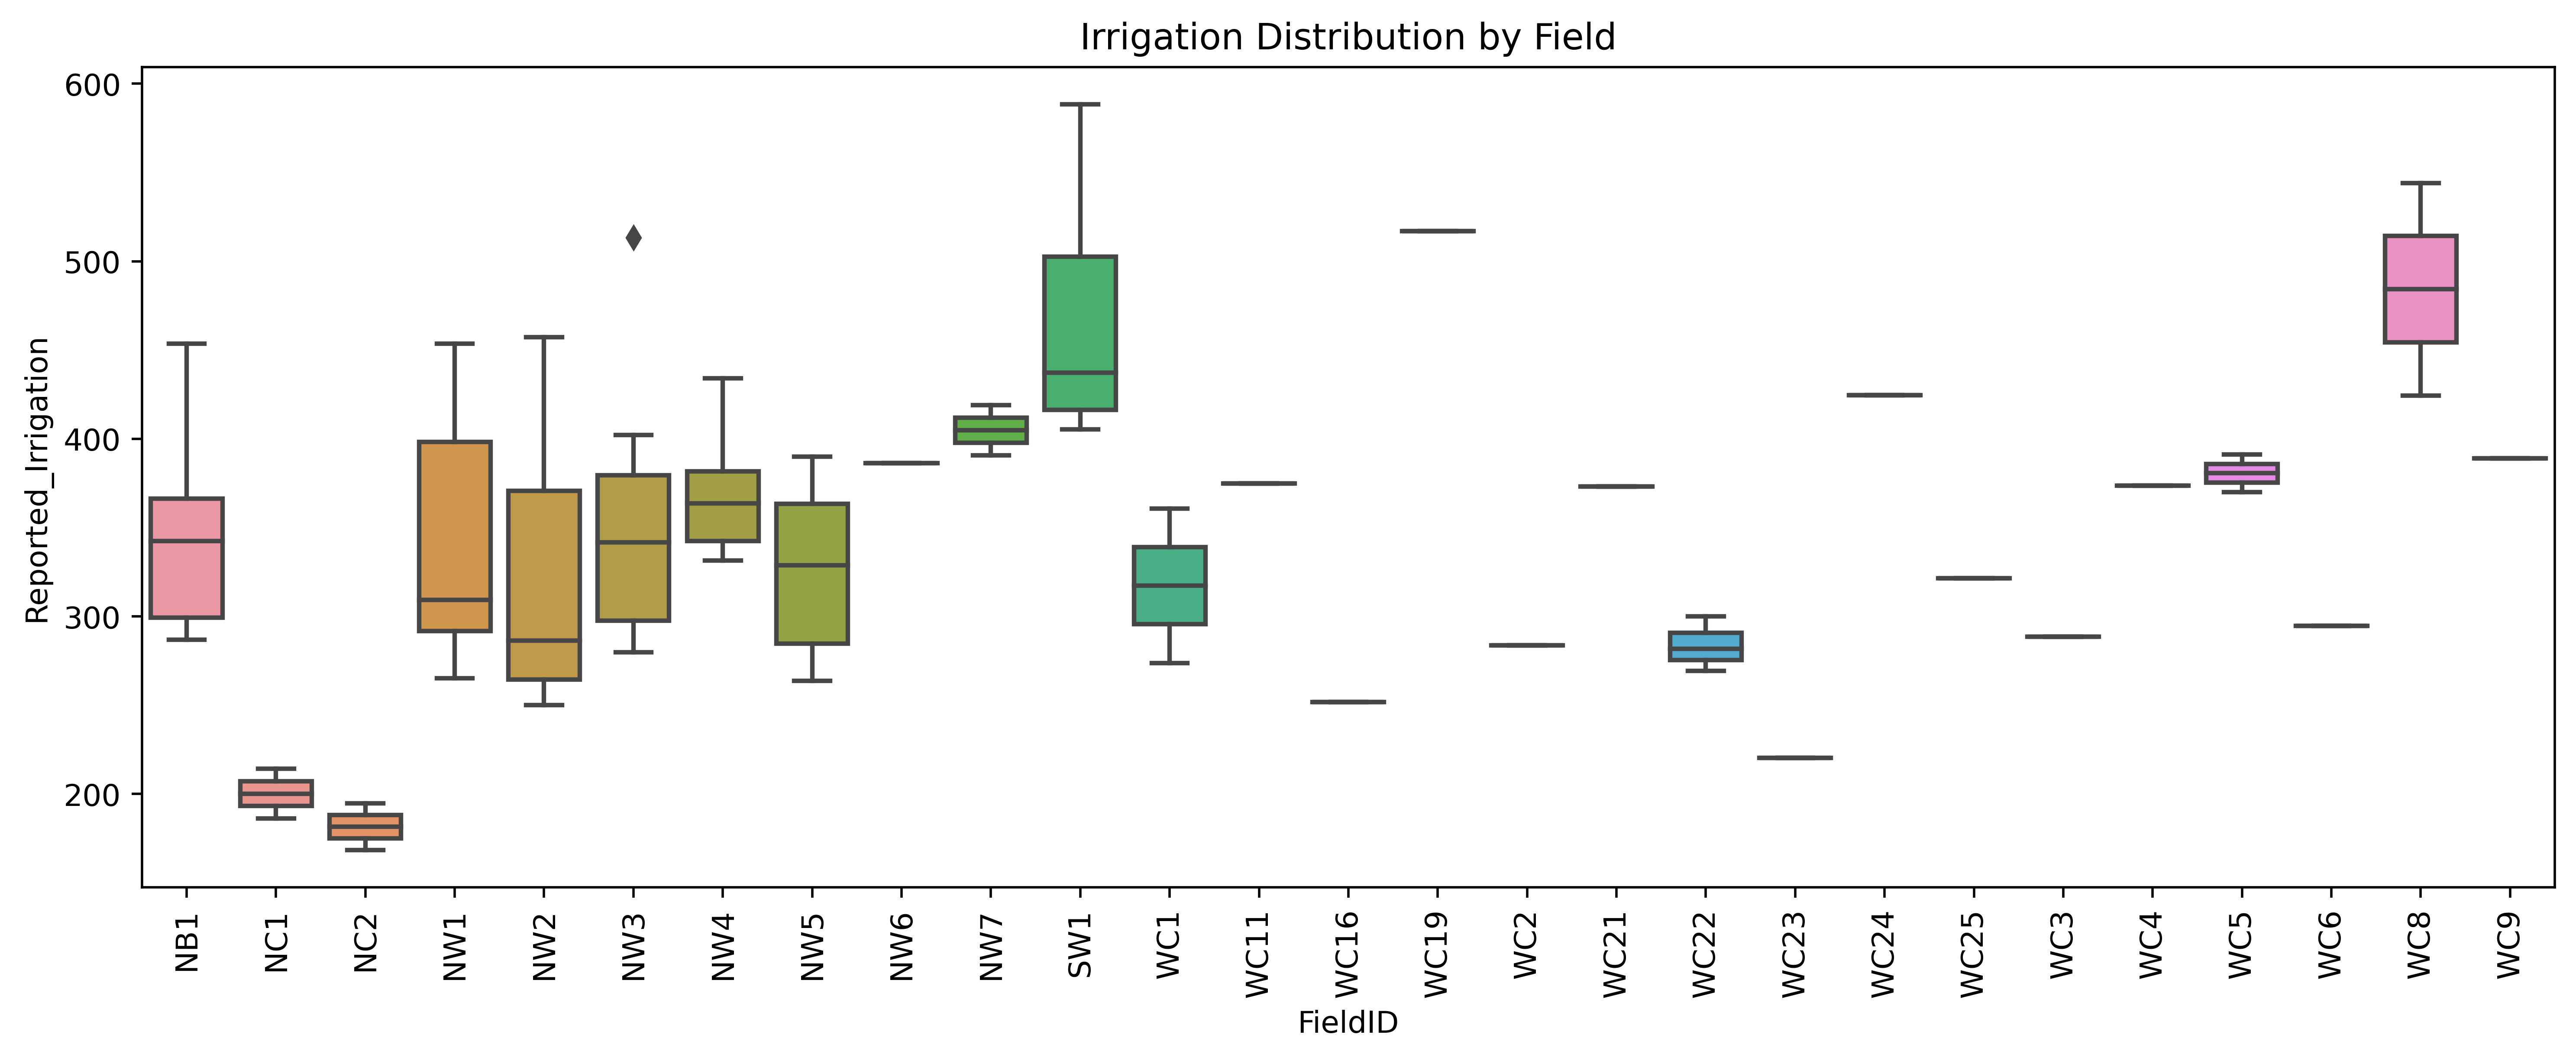

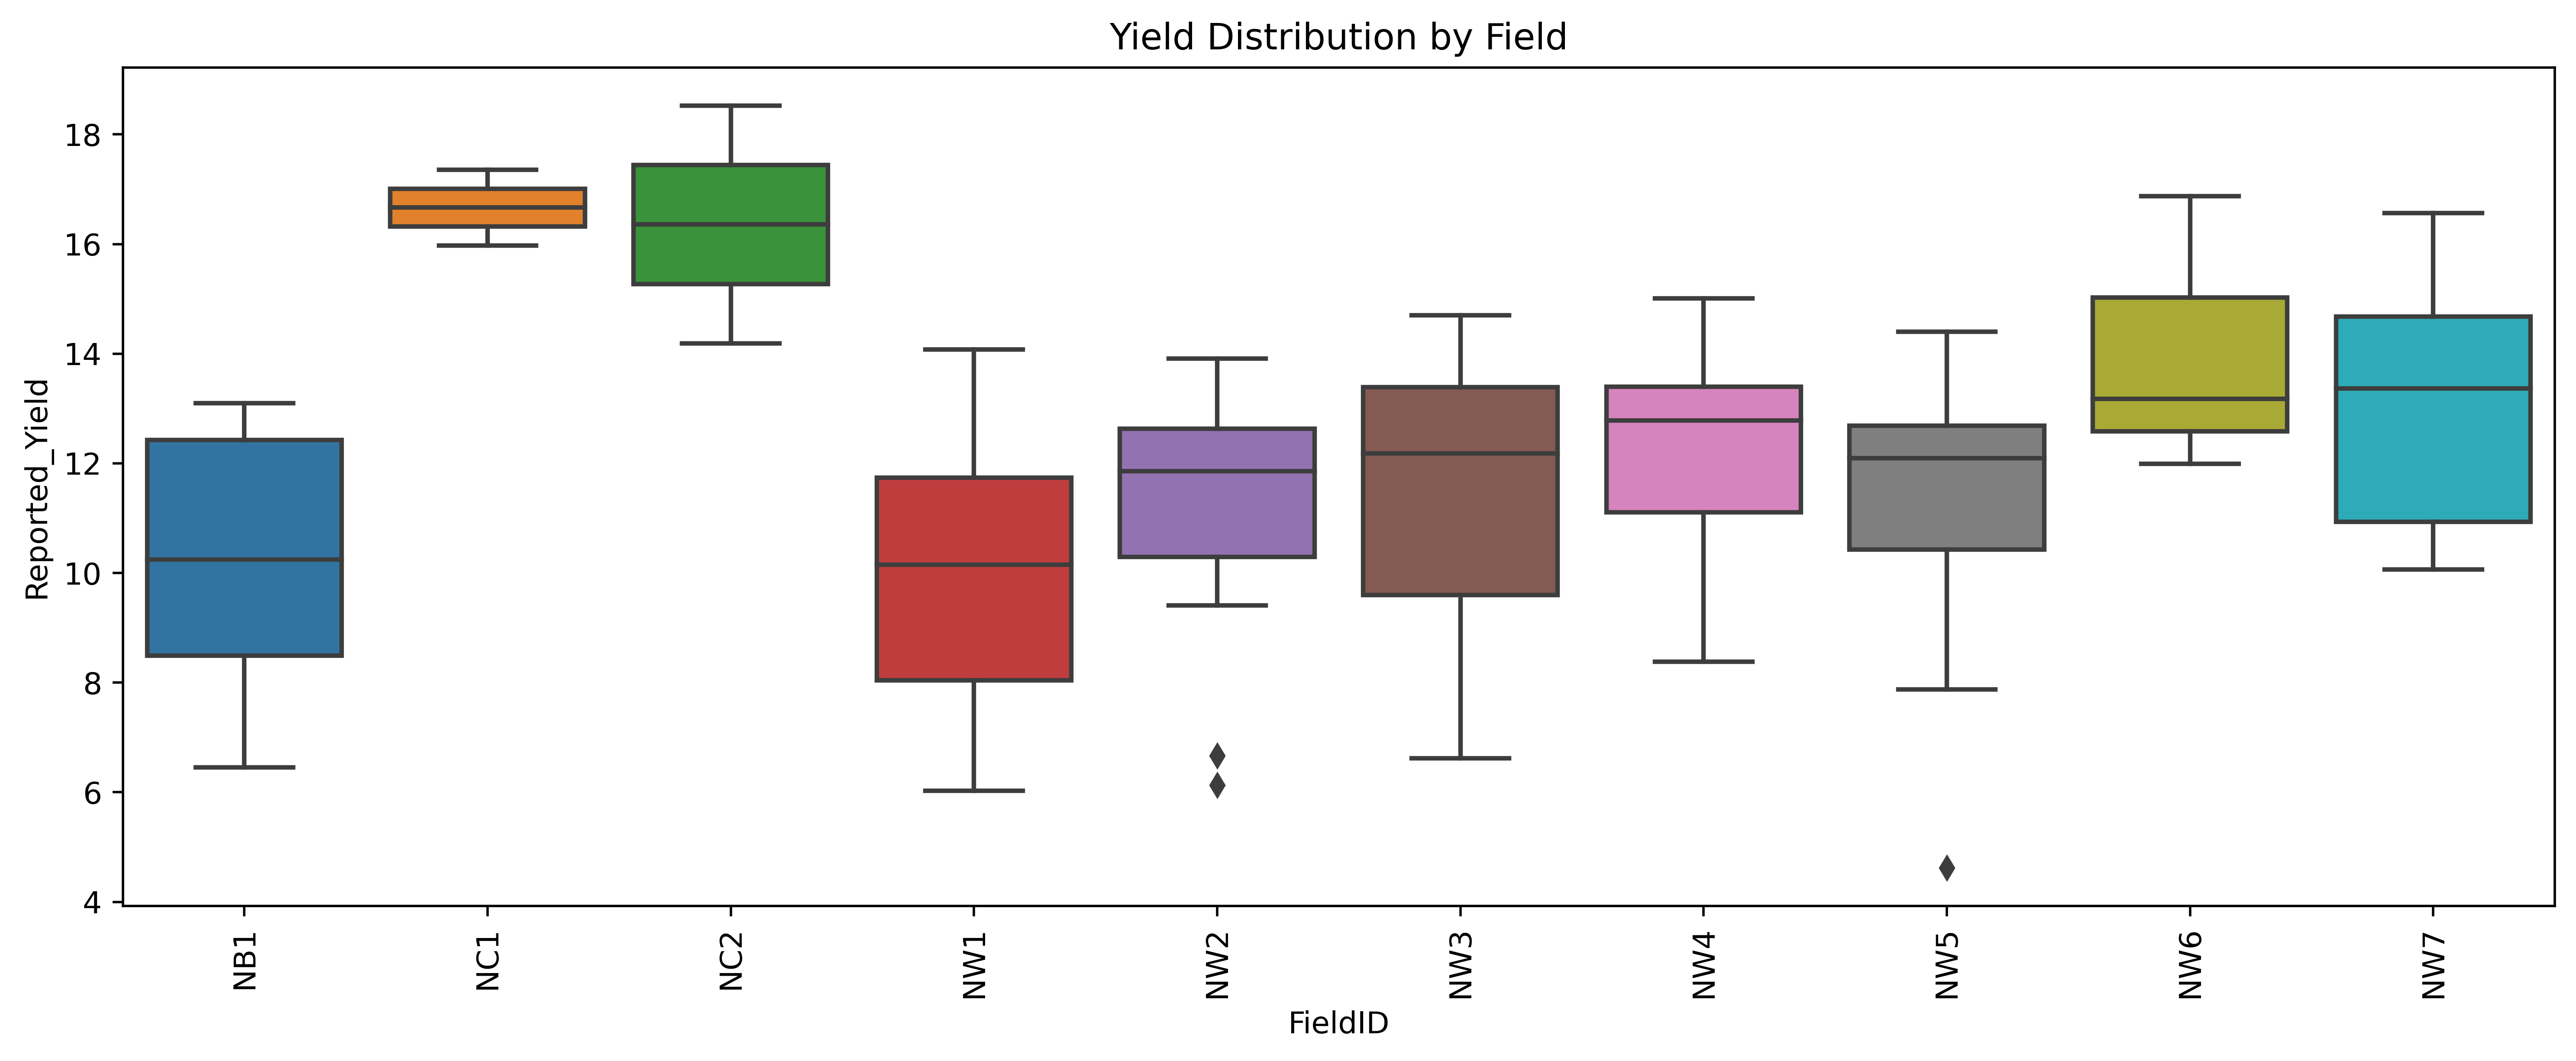

In [184]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=irrig_df, x='FieldID', y='Reported_Irrigation')
plt.xticks(rotation=90)
plt.title("Irrigation Distribution by Field")
plt.tight_layout()
plt.show()

# Plot yield distribution per field
plt.figure(figsize=(12, 5))
sns.boxplot(data=yld_df, x='FieldID', y='Reported_Yield')
plt.xticks(rotation=90)
plt.title("Yield Distribution by Field")
plt.tight_layout()
plt.show()

### NDVI data compiling from 2008 to 2022

data was extracted using the following script from GEE
- https://code.earthengine.google.com/6ac9f9352a452a0b788a50a37cef3a2f

In [134]:
l5_ndvi = pd.read_csv("Data/Landsat5_NDVI_2006_2013.csv")
l5_ndvi  =l5_ndvi .dropna()
l5_ndvi.date = pd.to_datetime(l5_ndvi .date)
l5_ndvi ["Year"] =l5_ndvi .date.dt.year
l5_ndvi["Month"] = l5_ndvi["date"].dt.month
# l5_ndvi= l5_ndvi[(l5_ndvi['date'].dt.month >= 6) & (l5_ndvi['date'].dt.month <= 11)]

l5_ndvi = l5_ndvi.sort_values(by="date")

l5_ndvi 

,FieldID,date,NDVI,Year,Month
4117,NC2,2006-01-14,0.234847,2006,1
4118,NC1,2006-01-14,0.130150,2006,1
16862,WC26,2006-01-21,0.387674,2006,1
16863,SW4,2006-01-21,0.180439,2006,1
16869,SW3,2006-01-21,0.428887,2006,1
...,...,...,...,...,...
29716,WC6,2012-05-04,0.726958,2012,5
29715,WC3,2012-05-04,0.724175,2012,5
29714,WC2,2012-05-04,0.656563,2012,5
29731,WC12,2012-05-04,0.181159,2012,5


In [135]:
l7_ndvi = pd.read_csv("Data/Landsat7_NDVI_2006_2013.csv")
l7_ndvi  =l7_ndvi .dropna()
l7_ndvi.date = pd.to_datetime(l7_ndvi .date)
l7_ndvi ["Year"] =l7_ndvi .date.dt.year
l7_ndvi["Month"] = l7_ndvi["date"].dt.month
l7_ndvi= l7_ndvi[(l7_ndvi['Year']== 2012)]
l7_ndvi = l7_ndvi.sort_values(by="date")

l8_ndvi = pd.read_csv("Data/Landsat8_NDVI_2014_2022.csv")
l8_ndvi  =l8_ndvi .dropna()
l8_ndvi["date"] = pd.to_datetime(l8_ndvi["date"])  # Ensure date is in datetime format
l8_ndvi["Year"] = l8_ndvi["date"].dt.year
l8_ndvi["Month"] = l8_ndvi["date"].dt.month
l8_ndvi = l8_ndvi.sort_values(by="date")

# merge them all
ndvi = pd.concat([l5_ndvi,l7_ndvi,l8_ndvi])
ndvi

,FieldID,date,NDVI,Year,Month
4117,NC2,2006-01-14,0.234847,2006,1
4118,NC1,2006-01-14,0.130150,2006,1
16862,WC26,2006-01-21,0.387674,2006,1
16863,SW4,2006-01-21,0.180439,2006,1
16869,SW3,2006-01-21,0.428887,2006,1
...,...,...,...,...,...
57114,NB1,2022-12-26,0.204913,2022,12
57128,NW1,2022-12-26,0.215890,2022,12
57129,NW2,2022-12-26,0.225351,2022,12
57130,NW3,2022-12-26,0.240792,2022,12


In [136]:
# looking at a field for a particular year
ndvi[(ndvi["FieldID"] =="NW1")  & (ndvi["Year"] ==2017)]

,FieldID,date,NDVI,Year,Month
51968,NW1,2017-01-10,0.214283,2017,1
52054,NW1,2017-02-11,0.167582,2017,2
52140,NW1,2017-03-15,0.206262,2017,3
52183,NW1,2017-04-16,0.198459,2017,4
52312,NW1,2017-06-19,0.293976,2017,6
52355,NW1,2017-07-05,0.601583,2017,7
52398,NW1,2017-07-21,0.743925,2017,7
52484,NW1,2017-08-22,0.726559,2017,8
52527,NW1,2017-09-07,0.622629,2017,9
52570,NW1,2017-10-25,0.200319,2017,10


In [83]:
# let's smooth it out by monthly max/mean and see relationship with yield
ndvi= ndvi[(ndvi['date'].dt.month >= 5) & (ndvi['date'].dt.month <= 10)]
subset = ndvi.groupby(["FieldID", "Year", "Month"])["NDVI"].max().reset_index()
subset

,FieldID,Year,Month,NDVI
0,NB1,2006,5,0.664704
1,NB1,2006,6,0.531550
2,NB1,2006,7,0.445985
3,NB1,2006,8,0.437555
4,NB1,2006,9,0.496668
...,...,...,...,...
4247,WC9,2022,6,0.229254
4248,WC9,2022,7,0.685436
4249,WC9,2022,8,0.780381
4250,WC9,2022,9,0.735238


In [141]:
# let's smooth it out by monthly max/mean and see relationship with yield
aug= ndvi[(ndvi['date'].dt.month >= 8) & (ndvi['date'].dt.month <= 8)]
aug_max = aug.groupby(["FieldID", "Year", "Month"])["NDVI"].max().reset_index()
aug_max

,FieldID,Year,Month,NDVI
0,NB1,2006,8,0.437555
1,NB1,2007,8,0.734182
2,NB1,2008,8,0.488189
3,NB1,2009,8,0.640418
4,NB1,2010,8,0.756889
...,...,...,...,...
725,WC9,2018,8,0.724742
726,WC9,2019,8,0.775158
727,WC9,2020,8,0.729147
728,WC9,2021,8,0.289472


In [84]:
# merging with yield
yearly_ndvi= subset.groupby(["FieldID", "Year"])["NDVI"].mean().reset_index()
yld_df=pd.merge(yld_df,yearly_ndvi, on= ["Year", "FieldID"], how ="inner")
yld_df

,Reported_Yield,Year,FieldID,NDVI_x,NDVI_y,NDVI
0,12.428670,2016,NB1,0.473712,0.473712,0.473712
1,10.184502,2017,NB1,0.511379,0.522278,0.522278
2,13.101181,2018,NB1,0.479135,0.518742,0.518742
3,8.171677,2020,NB1,0.454538,0.478198,0.478198
4,10.247718,2021,NB1,0.447998,0.475890,0.475890
...,...,...,...,...,...,...
84,10.427278,2010,NW5,0.393490,0.458743,0.458743
85,7.873083,2011,NW5,0.327296,0.361204,0.361204
86,8.400331,2012,NW5,0.415407,0.434644,0.434644
87,12.098467,2013,NW5,0.506166,0.529308,0.529308


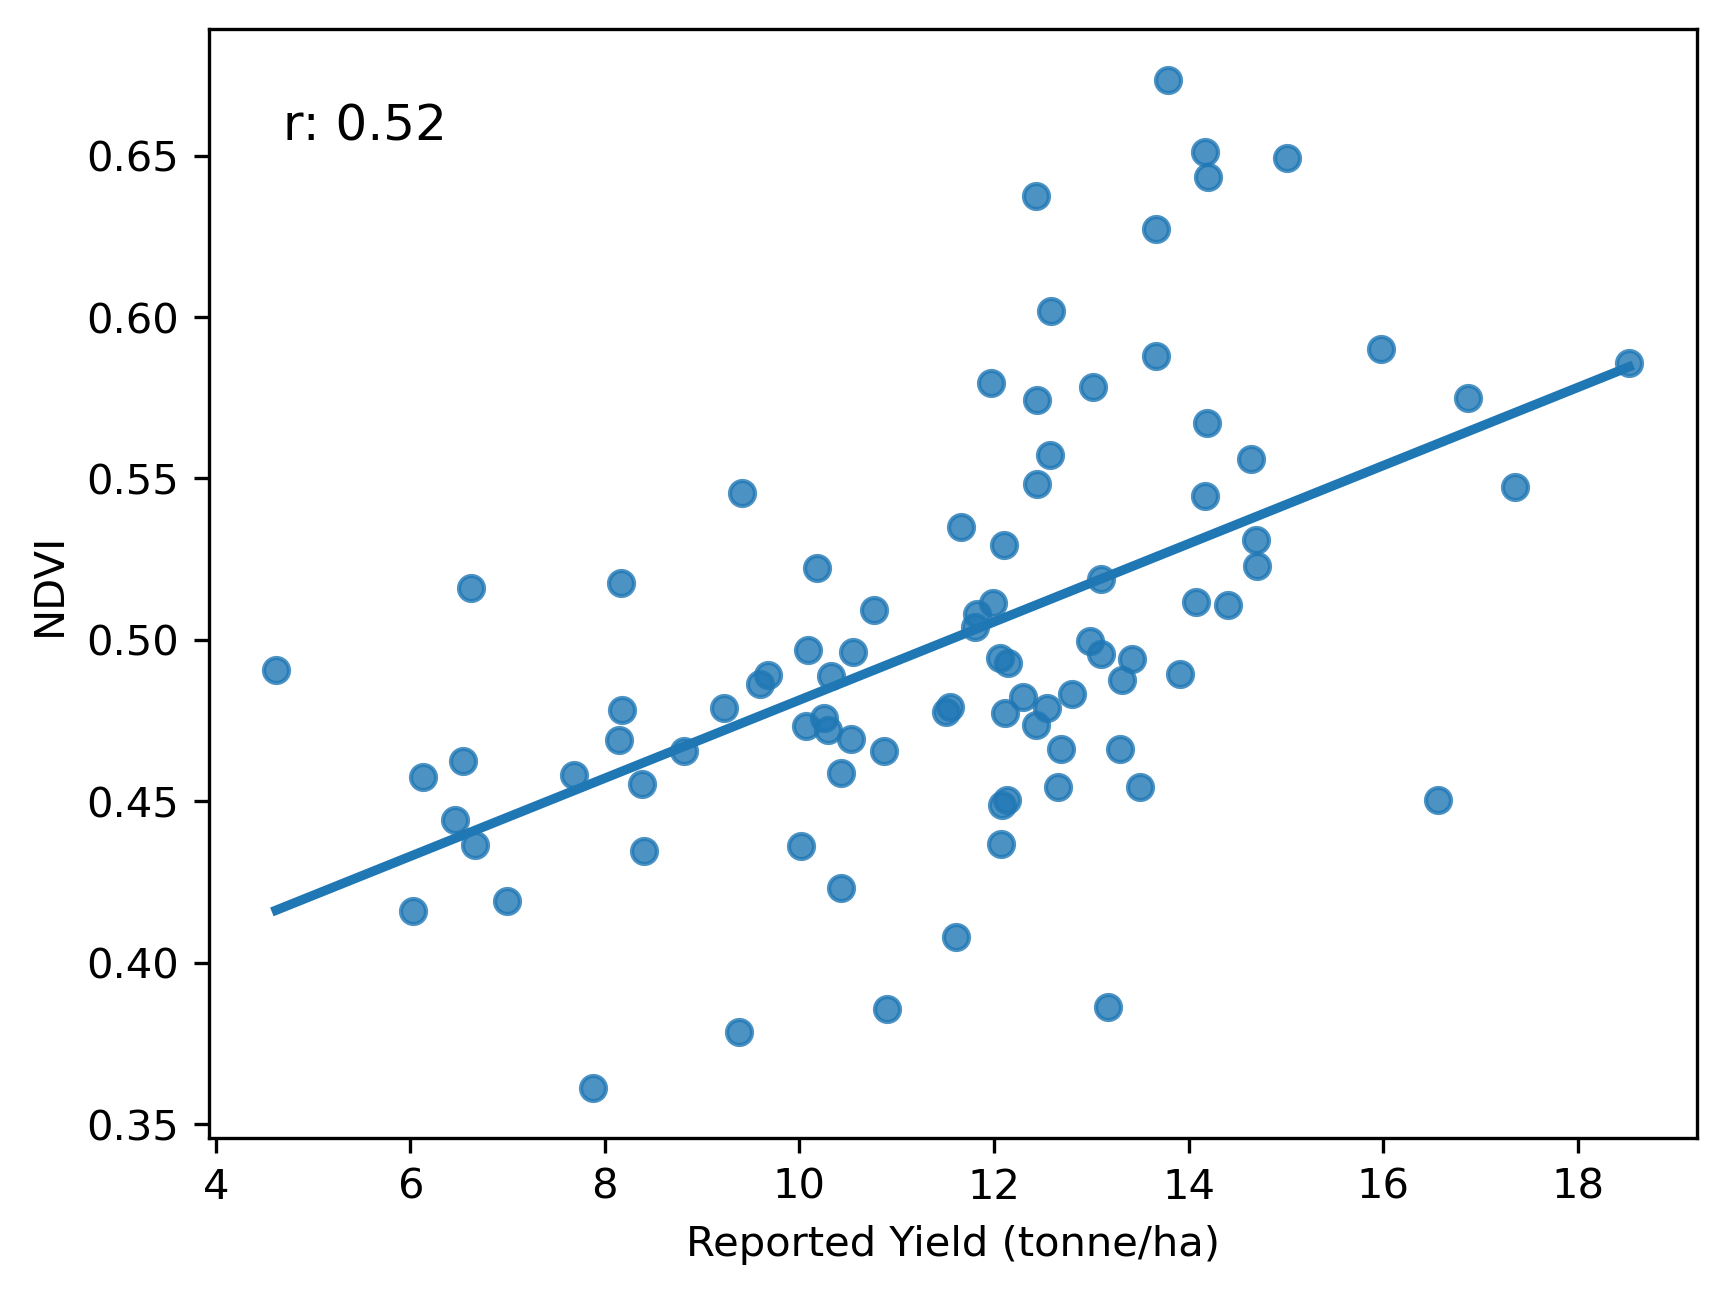

In [85]:

plt.rcParams["figure.dpi"] = 300

sns.regplot(x="Reported_Yield", y="NDVI", data=yld_df, ci =None)

# Calculate Pearson correlation coefficient
corr = yld_df['Reported_Yield'].corr(yld_df['NDVI'])
r2= corr


plt.annotate(f"r: {r2:.2f}", xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)

# Set labels
plt.xlabel('Reported Yield (tonne/ha)')
plt.ylabel('NDVI')

plt.show()

similarly we can see  july or aug ndvi relationship with yield



In [ ]:
# plot of NDVI for each field and every year (5-10 months)

field_of_interest = "NB1"   # set it to None if u want for all fields

# filter from 5-10
ndvi= ndvi[(ndvi['date'].dt.month >= 5) & (ndvi['date'].dt.month <= 10)]

# Select either all fields or just one
if field_of_interest is not None:
    ndvi = ndvi[ndvi["FieldID"] == field_of_interest]

# Get all field-year combinations
field_year_combinations = ndvi.groupby(["FieldID", "Year"]).size().index

# Iterate over each combination and plot
for field, year in field_year_combinations:
    data = ndvi[(ndvi["FieldID"] == field) & (ndvi["Year"] == year)]
    
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=data, x="date", y="NDVI", marker="o", color='g')
    
    # Horizontal line at NDVI = 0.5
    plt.axhline(y=0.5, color='g', linestyle='--', alpha=0.8,
                label='NDVI = 0.5' if 'NDVI = 0.5' not in plt.gca().get_legend_handles_labels()[1] else "")
    
    plt.title(f"NDVI Plot for Field: {field}, Year: {year}")
    plt.xlabel("Date")
    plt.ylabel("NDVI")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Other data

In [185]:
# GDD calculation according to AquaCrop manual
df = pd.read_csv('/Users/m089r172/Library/CloudStorage/OneDrive-UniversityofKansas/excel files/Updated_all_fieldsclimate.csv')
df["Date"] =df.Date.str[:8]
df["Date"]= pd.to_datetime(df["Date"])
df=df[df["Date"] < '2022-12-31']
df = df[(df['Date'].dt.month >= 6) & (df['Date'].dt.month <= 9)]
df['Year'] = df['Date'].dt.year
df.rename(columns={"fid": "FieldID"}, inplace =True)

# Define temperature thresholds
Tbase = 8   # Base temperature (°C)
Tupper = 30  # Upper temperature (°C)

# Function to calculate GDD using the Aquacrop method (without planting/harvesting dates)
def calculate_aquacrop_gdd(df):
    Tx = df['MaxTemp']
    Tn = df['MinTemp']

    # Adjust Tx
    if Tx > Tupper:
        Tx_star = Tupper
    elif Tx < Tbase:
        Tx_star = Tbase
    else:
        Tx_star = Tx

    # If Tn exceeds Tupper, set Tn to Tupper
    if Tn > Tupper:
        Tn = Tupper

    # Calculate average temperature using adjusted Tx
    tavg = (Tx_star + Tn) / 2

    # Apply base temperature condition to tavg
    if tavg < Tbase:
        tavg = Tbase

    # Calculate GDD (if below base, set to zero)
    gdd = max(0, tavg - Tbase)

    return gdd


# Apply the function to calculate daily GDD for each row
df['GDD'] = df.apply(calculate_aquacrop_gdd, axis=1)

# Now, group by 'Year' and 'FieldID' to get total GDD per field per year
yearly_field_gdd = df.groupby(['Year', 'FieldID'])['GDD'].sum().reset_index()
yearly_field_gdd




,Year,FieldID,GDD
0,2006,NB1,1597.896022
1,2006,NC1,1761.667150
2,2006,NC2,1754.742591
3,2006,NW1,1610.496436
4,2006,NW2,1609.433478
...,...,...,...
726,2022,WC5,1746.175034
727,2022,WC6,1746.847758
728,2022,WC7,1751.325027
729,2022,WC8,1751.325027


In [186]:
temp_exceded = df.groupby(["Year", "FieldID"]).apply(lambda group: (group["MaxTemp"] >= 33.89).sum()).reset_index()
temp_exceded = temp_exceded.rename(columns={0: 'Tmp_excede33'})
temp_exceded


,Year,FieldID,Tmp_excede33
0,2006,NB1,39
1,2006,NC1,41
2,2006,NC2,40
3,2006,NW1,50
4,2006,NW2,50
...,...,...,...
726,2022,WC5,60
727,2022,WC6,60
728,2022,WC7,59
729,2022,WC8,59


In [187]:
# Slope data
dem = pd.read_csv("Data/dem_percent_slope.csv").round(3)

# weather data
df = pd.read_csv('Data/Updated_all_fieldsclimate.csv')
df["Date"] =df.Date.str[:8]
df["Date"]= pd.to_datetime(df["Date"])
df=df[df["Date"] < '2022-12-31']
df = df[(df['Date'].dt.month >= 1) & (df['Date'].dt.month <= 9)]
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.rename(columns={"fid": "FieldID"}, inplace =True)
df

,Date,FieldID,MinTemp,MaxTemp,ReferenceET,Precipitation,Year,Month
0,2006-01-01,WC1,-4.115393,11.009027,1.489912,0.356292,2006,1
1,2006-01-01,WC2,-4.115393,11.009027,1.489912,0.356292,2006,1
2,2006-01-01,WC3,-4.115393,11.036188,1.503017,0.362230,2006,1
3,2006-01-01,WC6,-4.115393,11.026311,1.498251,0.360070,2006,1
4,2006-01-01,WC4,-4.115393,11.027134,1.498648,0.360250,2006,1
...,...,...,...,...,...,...,...,...
263026,2022-09-30,SW2,11.649988,32.749994,8.600000,0.000000,2022,9
263027,2022-09-30,WC10,11.350000,33.050012,8.700000,0.000000,2022,9
263028,2022-09-30,WC14,11.350000,33.050012,8.700000,0.000000,2022,9
263029,2022-09-30,WC7,11.050012,33.350000,8.700000,0.000000,2022,9


In [188]:
# precip
pdf = pd.read_csv('/Users/m089r172/Library/CloudStorage/OneDrive-UniversityofKansas/excel files/Updated_all_fieldsclimate.csv')
pdf.rename(columns={"fid": "FieldID"}, inplace =True)
pdf["Date"] =pdf.Date.str[:8]
pdf["Date"]= pd.to_datetime(pdf["Date"])
pdf['Year'] = pdf['Date'].dt.year
pdf=pdf[pdf["Date"] < '2022-12-31']
pdf = pdf[(pdf['Date'].dt.month >= 1) & (pdf['Date'].dt.month <= 9)]
Precip_sum =pdf.groupby(["Year", "FieldID"])["Precipitation"].sum().reset_index()
Precip_sum.rename(columns={'Precipitation': 'Precip_sum'}, inplace=True)
Precip_sum

,Year,FieldID,Precip_sum
0,2006,NB1,401.240265
1,2006,NC1,585.972747
2,2006,NC2,585.725606
3,2006,NW1,378.686487
4,2006,NW2,374.874281
...,...,...,...
726,2022,WC5,237.000003
727,2022,WC6,231.800002
728,2022,WC7,236.000000
729,2022,WC8,236.000000


In [189]:
# ref_ET
retdf = pd.read_csv('/Users/m089r172/Library/CloudStorage/OneDrive-UniversityofKansas/excel files/Updated_all_fieldsclimate.csv')
retdf.rename(columns={"fid": "FieldID"}, inplace =True)
retdf["Date"] =retdf.Date.str[:8]
retdf["Date"]= pd.to_datetime(retdf["Date"])
retdf['Year'] = retdf['Date'].dt.year
retdf=retdf[retdf["Date"] < '2022-12-31']
retdf = retdf[(retdf['Date'].dt.month >= 3) & (retdf['Date'].dt.month <= 9)]
ret_sum =retdf.groupby(["Year", "FieldID"])["ReferenceET"].sum().reset_index()
ret_sum.rename(columns={'ReferenceET': 'ReferenceET_sum'}, inplace=True)
ret_sum

,Year,FieldID,ReferenceET_sum
0,2006,NB1,1182.380421
1,2006,NC1,1121.125278
2,2006,NC2,1119.502288
3,2006,NW1,1213.645722
4,2006,NW2,1208.424971
...,...,...,...
726,2022,WC5,1368.999996
727,2022,WC6,1369.072725
728,2022,WC7,1363.199999
729,2022,WC8,1363.199999


In [190]:
# vapour pressure deficiet
vpd = pd.read_csv("Data/vpd_final.csv")
vpd.date = pd.to_datetime(vpd.date)
vpd["Year"] =vpd.date.dt.year
vpd["Month"] = vpd["date"].dt.month
vpd = vpd[(vpd['date'].dt.month >= 6) & (vpd['date'].dt.month <= 7)]
vpd = vpd.groupby([ "Year", "FieldID"])["vpd"].mean().reset_index()
vpd

,Year,FieldID,vpd
0,2006,NB1,2.071490
1,2006,NC1,1.920248
2,2006,NC2,1.934882
3,2006,NW1,2.157595
4,2006,NW2,2.157595
...,...,...,...
769,2023,WC5,1.444262
770,2023,WC6,1.444262
771,2023,WC7,1.415410
772,2023,WC8,1.413770


In [191]:
# features = ['MinTemp', 'MaxTemp', 'ReferenceET', 'Precipitation']
features = ['MinTemp', 'MaxTemp']
grouped = df.groupby(['FieldID', 'Year'])

aggregated = grouped[features].agg(['mean'])

aggregated = aggregated.reset_index()

# # Flatten the MultiIndex columns
aggregated.columns = ['_'.join(col).strip('_') for col in aggregated.columns]
df  = aggregated
df

,FieldID,Year,MinTemp_mean,MaxTemp_mean
0,NB1,2006,5.748091,22.637185
1,NB1,2007,5.564423,20.372435
2,NB1,2008,4.184778,20.283481
3,NB1,2009,4.674253,20.588037
4,NB1,2010,5.301370,21.059499
...,...,...,...,...
726,WC9,2018,6.297985,22.996154
727,WC9,2019,6.317033,20.905678
728,WC9,2020,6.233577,22.562774
729,WC9,2021,6.044139,21.974176


In [192]:
# GDD
df =pd.merge(df,yearly_field_gdd, on= ["Year", "FieldID"], how = "inner" )

In [193]:
# Soil data
# def assign_soil(field_id):
#     if field_id.startswith("NW") or field_id.startswith("WC") or field_id.startswith ("NB") :
#         return  1          #"silt loam"
#     elif field_id.startswith("SW"):
#         return 2 if field_id == "SW1" else 3
#     else:
#         return 4

# # Apply function to create new column
# df["Soil"] = df["FieldID"].apply(assign_soil)
# df

In [194]:
# NDVI data

ndvi = pd.read_csv("Data/NDVI_SR_full_2006_2022.csv").drop("Unnamed: 0", axis =1)
# ndvi = ndvi.groupby(["FieldID", "Year", "Month"])["NDVI"].mean().reset_index()
ndvi = ndvi[(ndvi['Month'] >= 6) & (ndvi['Month'] <= 9)]
ndvi = ndvi.groupby([ "Year", "FieldID"])["NDVI"].mean().reset_index()
df =pd.merge(df,ndvi, on= ["Year", "FieldID"], how = "inner" )

ndvi = pd.read_csv("Data/NDVI_SR_full_2006_2022.csv").drop("Unnamed: 0", axis =1)
sep_NDVI = ndvi.groupby([ "Year", "FieldID"])["NDVI_Aug"].mean().reset_index()
df =pd.merge(df,sep_NDVI, on= ["Year", "FieldID"], how = "inner" )

df

,FieldID,Year,MinTemp_mean,MaxTemp_mean,GDD,NDVI,NDVI_Aug
0,NB1,2006,5.748091,22.637185,1597.896022,0.486838,0.521433
1,NB1,2007,5.564423,20.372435,1690.630476,0.585926,0.806751
2,NB1,2008,4.184778,20.283481,1552.391208,0.596950,0.557164
3,NB1,2009,4.674253,20.588037,1472.211618,0.543487,0.721746
4,NB1,2010,5.301370,21.059499,1673.977582,0.657029,0.835557
...,...,...,...,...,...,...,...
726,WC9,2018,6.297985,22.996154,1744.700061,0.521188,0.811110
727,WC9,2019,6.317033,20.905678,1780.024924,0.588471,0.862005
728,WC9,2020,6.233577,22.562774,1678.575052,0.464236,0.800134
729,WC9,2021,6.044139,21.974176,1772.799899,0.328309,0.310953


In [195]:
# Monthly sum of  ET
et_df = pd.read_csv('Data/ET_2nd.csv')
# et_df = pd.read_csv('/Users/m089r172/Downloads/dailyet.csv')

et_df =et_df.dropna()
et_df.date = pd.to_datetime(et_df.date)
et_df["Year"] = et_df.date.dt.year
et_df= et_df[(et_df['date'].dt.month >= 1) & (et_df['date'].dt.month <= 9)]
et_df= et_df.groupby(["FieldID", "Year"])["ET"].sum().reset_index()
et_df.rename(columns={'ET': 'ET_sum'}, inplace=True)
et_df

,FieldID,Year,ET_sum
0,NB1,2006,710.494653
1,NB1,2007,637.103453
2,NB1,2008,637.470320
3,NB1,2009,599.413501
4,NB1,2010,741.942423
...,...,...,...
726,WC9,2018,858.548620
727,WC9,2019,688.166255
728,WC9,2020,830.654732
729,WC9,2021,544.646165


In [196]:

df =pd.merge(df,et_df, on= ["Year", "FieldID"], how = "inner" )
df = pd.merge(df,vpd, on= ["Year", "FieldID"], how = "inner" )
df =pd.merge(df,Precip_sum, on= ["Year", "FieldID"], how = "inner" ) 
df =pd.merge(df,ret_sum, on= ["Year", "FieldID"], how = "inner" ) 
df =pd.merge(df,temp_exceded, on= ["Year", "FieldID"], how = "inner" )
df =  pd.merge(df,dem, on= ["FieldID"], how = "inner" )
df['Precip_deficit']  = df["ET_sum"] - df["Precip_sum"]
df

,FieldID,Year,MinTemp_mean,MaxTemp_mean,GDD,NDVI,NDVI_Aug,ET_sum,vpd,Precip_sum,ReferenceET_sum,Tmp_excede33,Percent_Slope,Precip_deficit
0,NB1,2006,5.748091,22.637185,1597.896022,0.486838,0.521433,710.494653,2.071490,401.240265,1182.380421,39,5.472,309.254388
1,NB1,2007,5.564423,20.372435,1690.630476,0.585926,0.806751,637.103453,1.555656,496.515584,1124.906870,35,5.472,140.587869
2,NB1,2008,4.184778,20.283481,1552.391208,0.596950,0.557164,637.470320,1.758156,414.797127,1101.175623,25,5.472,222.673194
3,NB1,2009,4.674253,20.588037,1472.211618,0.543487,0.721746,599.413501,1.214826,537.593558,1011.833012,12,5.472,61.819943
4,NB1,2010,5.301370,21.059499,1673.977582,0.657029,0.835557,741.942423,1.690482,652.551486,1160.753291,38,5.472,89.390937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,WC9,2018,6.297985,22.996154,1744.700061,0.521188,0.811110,858.548620,1.861113,446.900003,1272.799998,35,3.460,411.648617
727,WC9,2019,6.317033,20.905678,1780.024924,0.588471,0.862005,688.166255,1.694521,458.599998,1157.999998,37,3.460,229.566256
728,WC9,2020,6.233577,22.562774,1678.575052,0.464236,0.800134,830.654732,1.978127,361.800003,1270.200000,42,3.460,468.854729
729,WC9,2021,6.044139,21.974176,1772.799899,0.328309,0.310953,544.646165,1.675691,430.800003,1216.100000,42,3.460,113.846162


In [197]:
yld_df

,Reported_Yield,Year,FieldID
0,12.428670,2016,NB1
1,10.184502,2017,NB1
2,13.101181,2018,NB1
4,8.171677,2020,NB1
5,10.247718,2021,NB1
...,...,...,...
136,10.427278,2010,NW5
137,7.873083,2011,NW5
138,8.400331,2012,NW5
139,12.098467,2013,NW5


In [198]:
yld_df=pd.merge(yld_df,df, on= ["Year", "FieldID"], how ="inner")
yld_df

,Reported_Yield,Year,FieldID,MinTemp_mean,MaxTemp_mean,GDD,NDVI,NDVI_Aug,ET_sum,vpd,Precip_sum,ReferenceET_sum,Tmp_excede33,Percent_Slope,Precip_deficit
0,12.428670,2016,NB1,6.106788,22.029015,1644.890021,0.651859,0.603531,676.170587,1.781269,544.150002,1139.259996,33,5.472,132.020586
1,10.184502,2017,NB1,5.822711,21.877106,1614.254973,0.660628,0.823997,648.051550,1.951652,535.800001,1148.359997,33,5.472,112.251549
2,13.101181,2018,NB1,4.975202,20.631099,1644.100009,0.714815,0.856244,696.440038,1.620673,443.960002,1130.510002,29,5.472,252.480036
3,8.171677,2020,NB1,5.105658,21.794927,1624.754994,0.587987,0.759675,656.890253,1.925848,331.310000,1218.569996,43,5.472,325.580253
4,10.247718,2021,NB1,5.365971,21.024176,1718.870071,0.660427,0.769854,630.049208,1.791752,438.000001,1166.679999,43,5.472,192.049207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,10.427278,2010,NW5,5.358873,21.483788,1678.094235,0.632124,0.848636,680.589186,1.811286,500.463421,1190.294696,47,4.025,180.125765
85,7.873083,2011,NW5,5.241023,23.079517,1703.116681,0.599659,0.809075,645.507771,2.356133,513.787253,1253.859250,65,4.025,131.720518
86,8.400331,2012,NW5,7.137018,25.398542,1742.358807,0.571647,0.599178,733.643316,2.941741,280.576171,1442.532989,65,4.025,453.067145
87,12.098467,2013,NW5,5.163082,22.073193,1677.740152,0.632650,0.847245,789.115758,2.253056,412.144595,1189.272089,52,4.025,376.971163


In [199]:
irrig_df=pd.merge(irrig_df,df, on= ["Year", "FieldID"], how ="inner")
irrig_df

,Reported_Irrigation,Year,FieldID,MinTemp_mean,MaxTemp_mean,GDD,NDVI,NDVI_Aug,ET_sum,vpd,Precip_sum,ReferenceET_sum,Tmp_excede33,Percent_Slope,Precip_deficit
0,300.984585,2016,NB1,6.106788,22.029015,1644.890021,0.651859,0.603531,676.170587,1.781269,544.150002,1139.259996,33,5.472,132.020586
1,297.575357,2017,NB1,5.822711,21.877106,1614.254973,0.660628,0.823997,648.051550,1.951652,535.800001,1148.359997,33,5.472,112.251549
2,369.860074,2018,NB1,4.975202,20.631099,1644.100009,0.714815,0.856244,696.440038,1.620673,443.960002,1130.510002,29,5.472,252.480036
3,342.563728,2020,NB1,5.105658,21.794927,1624.754994,0.587987,0.759675,656.890253,1.925848,331.310000,1218.569996,43,5.472,325.580253
4,286.767030,2021,NB1,5.365971,21.024176,1718.870071,0.660427,0.769854,630.049208,1.791752,438.000001,1166.679999,43,5.472,192.049207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,288.890049,2015,NW2,5.889016,22.367288,1700.526132,0.724703,0.892537,726.855923,1.646104,489.789186,1165.082234,44,4.102,237.066737
74,279.738151,2015,NW3,5.895191,22.370999,1701.755233,0.822295,0.879452,808.127990,1.646104,487.784813,1164.180538,44,3.796,320.343176
75,331.420370,2015,NW4,5.889016,22.367288,1700.526132,0.702208,0.872027,747.244986,1.652755,489.789186,1165.082234,44,3.941,257.455799
76,342.272578,2015,NW5,5.889016,22.367288,1700.526132,0.652330,0.863285,691.859398,1.652755,489.789186,1165.082234,44,4.025,202.070211


In [201]:
# yld_df.to_csv("Data/yield_model_data.csv")
# irrig_df.to_csv("Data/irrig_model_data.csv")